In [1]:
# not temp
import tensorflow as tf

# Probably temp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
image = np.asarray(Image.open('C:/Users/turbo/Documents/Lane-finder/Lane-Finder/imgs/0000_0085e9e41513078a_2018-08-19--13-26-08_11_864.png'))
image_array = image.copy()

mask = np.asarray(Image.open('C:/Users/turbo/Documents/Lane-finder/Lane-Finder/masks/0000_0085e9e41513078a_2018-08-19--13-26-08_11_864.png'))
mask_array = mask.copy()

In [9]:
mask_array.shape

(874, 1164, 3)

(874, 1164)


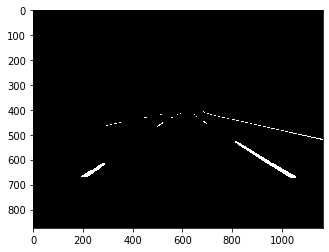

In [12]:
mask = np.asarray(Image.open('C:/Users/turbo/Documents/Lane-finder/Lane-Finder/masks/0000_0085e9e41513078a_2018-08-19--13-26-08_11_864.png')).copy()
red_channel = (mask_array == 255)[:,:,0]

test = 255*np.dstack((red_channel,red_channel,red_channel))
print(red_channel.shape)
plt.imshow(test)
plt.show()

In [2]:
train_images = pickle.load(open("C:/Users/turbo/Documents/Lane-finder/Lane-Finder/imgs/full_CNN_train.p", "rb" ))

train_images = np.array(train_images)

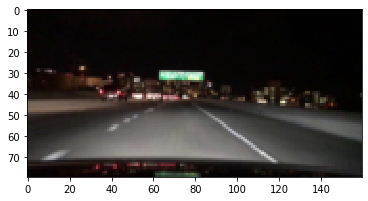

In [3]:
plt.imshow(train_images[12])
plt.show()



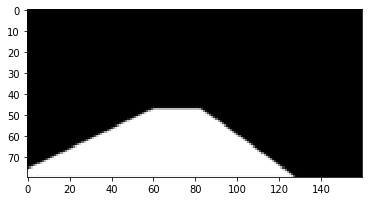

In [4]:
labels = pickle.load(open("C:/Users/turbo/Documents/Lane-finder/Lane-Finder/masks/full_CNN_labels.p", "rb" ))
labels = np.array(labels)/255

plt.imshow(np.dstack((labels[12],labels[12],labels[12])))
plt.show()

In [17]:
print(labels.shape)


(12764, 80, 160, 1)


In [9]:
cv_pct = 0.2

idx = np.random.randint(len(train_images), size = round(len(train_images)*cv_pct))
mask = np.ones(train_images.shape[0], dtype = bool)
mask[idx] = False

Train_images = train_images[mask]
test_images = train_images[idx]

Train_labels = labels[mask]
test_labels = labels[idx]

# print('train labs',Train_labels.shape)
# print('test images',test_images.shape)
# print('train images',Train_images.shape)
# print('test labs',test_labels.shape)

In [10]:
batch_size = 128
epochs = 10
pool_size = (3, 3)
kernel_size = (7,7)
input_shape = Train_images.shape[1:]

In [15]:
# resnet kernel size - 7x7 for the conv2d layers and 3x3 for max pooling 

def build_fully_cnn_model():
    model = tf.keras.models.Sequential([
    #tf.keras.layers.BatchNormalization(input_shape=input_shape),
    tf.keras.layers.Conv2D(8, (7, 7), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'),
    tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'),
    tf.keras.layers.MaxPool2D(pool_size=pool_size),
    tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(pool_size=pool_size),
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=pool_size),
    tf.keras.layers.UpSampling2D(size=pool_size),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.UpSampling2D(size=pool_size),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.UpSampling2D(size=pool_size),
    tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'),
    ])

    model.summary() 
    
    # seems to me that stochastic gradient descent converges much more often than adam
    # switch back to sgd eventually
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    return model